In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools
import numpy as np
import math

1. Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib, см. пример: ссылка).

2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.


In [ ]:
def visualize_polygon_sequence(polygon_sequence):
  fig, ax = plt.subplots()
  for polygon in polygon_sequence:
    poly = patches.Polygon(polygon, edgecolor='black')
    ax.add_patch(poly)
  ax.autoscale()
  plt.axis('equal')
  plt.show()

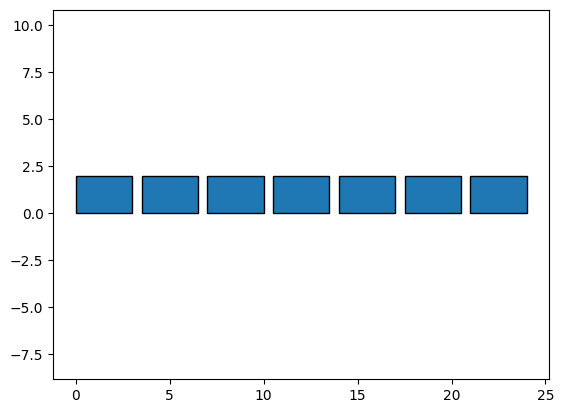

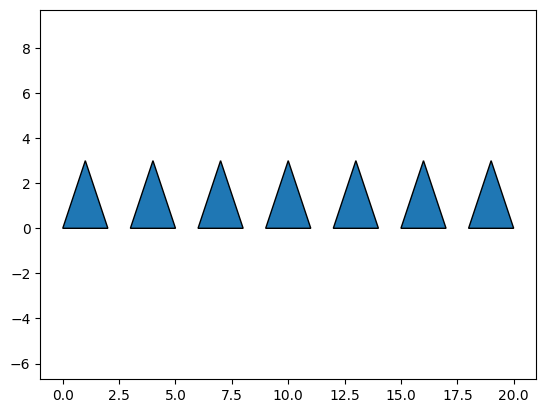

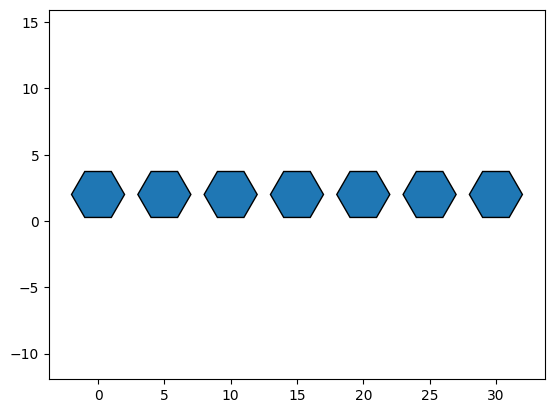

In [ ]:
def gen_rectangle(xs,ys,l,w,cx,cy):
  x,y=xs,ys
  while True:
    yield ((x,y),(x+l,y),(x+l,y+w),(x,y+w))
    x=x+cx
    y=y+cy

def gen_triangle(xs,ys,l,w,cx,cy):#треугольник
    x,y=xs,ys
    while True:
        yield ((x,y),(x +l,y),(x+(l/2), y+w))
        x=x+cx
        y=y+cy

def gen_hexagon(xs,ys,l,cx,cy):#шестиугольник
    x,y=xs,ys
    angle=2*math.pi/6  # Угол между сторонами правильного шестиугольника
    while True:
      hexagon = []
      for i in range(6):
        hexagon.append((x + l * math.cos(i * angle), y + l * math.sin(i * angle)))
      yield hexagon
      x=x+cx
      y=y+cy
def gen_figures(gen_func, num_fig):
  return itertools.islice(gen_func, num_fig)

rectangles = gen_rectangle(0, 0, 3, 2, 3.5, 0)
seven_rectangles = gen_figures(rectangles, 7)
triangles = gen_triangle(0, 0, 2, 3, 3, 0)
seven_triangles = gen_figures(triangles, 7)
hexagons = gen_hexagon(0, 2, 2, 5, 0)
seven_hexagons = gen_figures(hexagons, 7)
rectangle = tuple(rectangle for rectangle in seven_rectangles)
triangle = tuple(triangles for triangles in seven_triangles)
hexagon = tuple( hexagons for hexagons in seven_hexagons)
visualize_polygon_sequence(rectangle)
visualize_polygon_sequence(triangle)
visualize_polygon_sequence(hexagon)

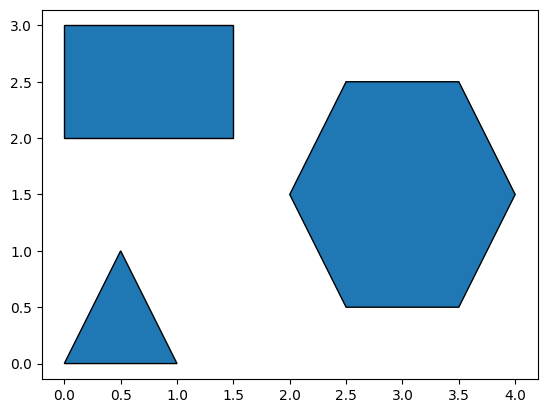

In [ ]:
polygons = (((0,0), (1,0), (0.5,1)),((0,2), (0,3), (1.5,3), (1.5,2)),((2.5,0.5),(2.0,1.5),(2.5,2.5),(3.5,2.5),(4.0,1.5),(3.5,0.5)))
visualize_polygon_sequence(polygons)

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.


In [ ]:
def tr_translate(pol,px,py):
    return [(x + px, y + py) for x, y in pol]

def tr_rotate(pol, angle):
     return [((x * math.cos(angle) - y * math.sin(angle)),(x * math.sin(angle) + y * math.cos(angle))) for x, y in pol]
def tr_homothety(pol, factor):
    return  [(x * factor, y *factor) for x, y in pol]


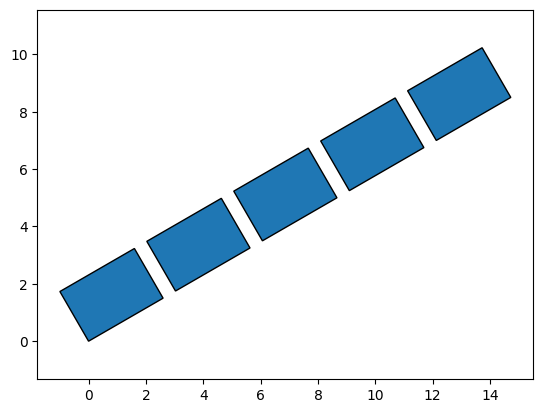

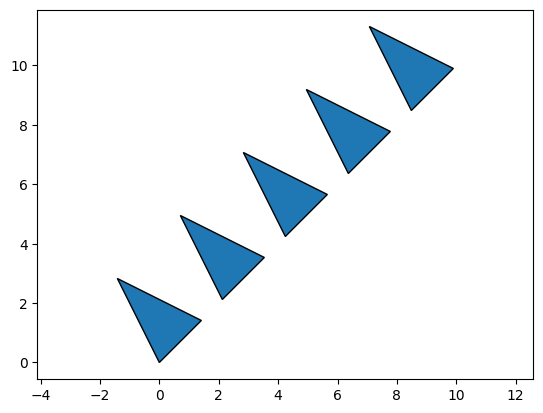

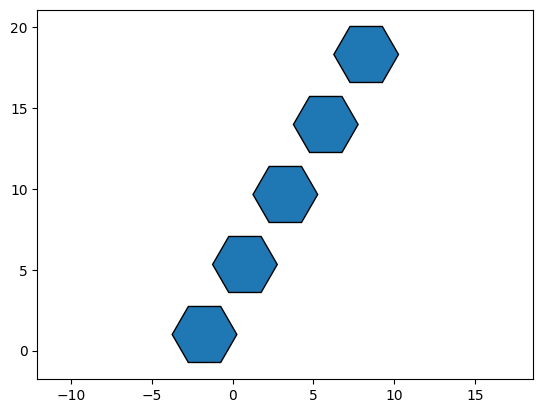

In [ ]:
#поворот
rectangles = gen_rectangle(0, 0, 3, 2, 3.5, 0)
five_rectangles = gen_figures(rectangles, 5)
triangles = gen_triangle(0, 0, 2, 3, 3, 0)
five_triangles = gen_figures(triangles, 5)
hexagons = gen_hexagon(0, 2, 2, 5, 0)
five_hexagons = gen_figures(hexagons, 5)

rotated_rectangles = map(lambda pol: tr_rotate(pol, math.radians(30)),  five_rectangles)
rotated_triangles = map(lambda pol: tr_rotate(pol, math.radians(45)), five_triangles)
rotated_hexagons = map(lambda pol: tr_rotate(pol, math.radians(60)), five_hexagons)

rectangle = tuple(rectangle for rectangle in rotated_rectangles)
triangle = tuple(triangles for triangles in rotated_triangles)
hexagon = tuple( hexagons for hexagons in rotated_hexagons)

visualize_polygon_sequence(rectangle)
visualize_polygon_sequence(triangle)
visualize_polygon_sequence(hexagon)

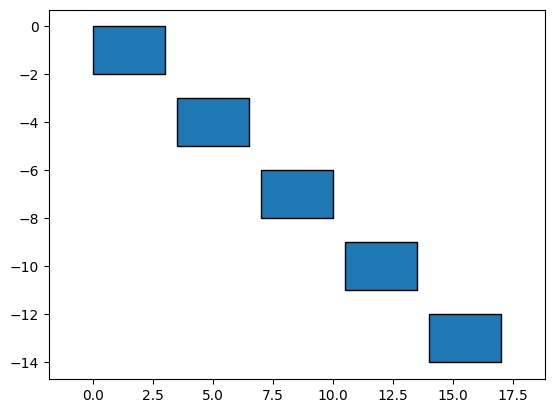

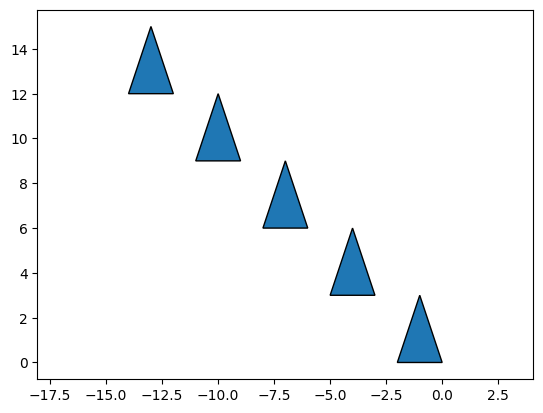

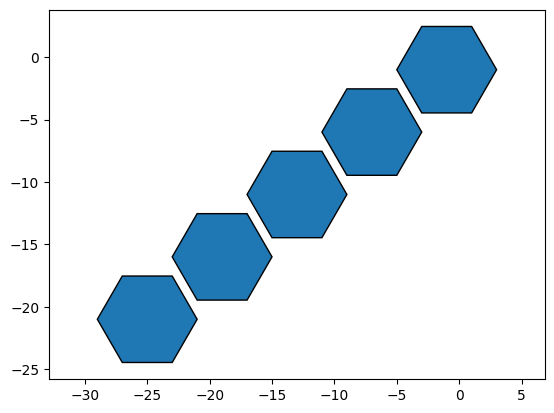

In [ ]:
#симметрия

def tr_symmetry(pol,axis):
  if axis=='x':
    return [(x, -y) for x, y in pol]
  elif axis=='y':
    return [(-x, y) for x, y in pol]
  elif axis=='xy':
    return [(-x, -y) for x, y in pol]
rectangles = gen_rectangle(0, 0, 3, 2, 3.5, 3)
five_rectangles = gen_figures(rectangles, 5)
triangles = gen_triangle(0, 0, 2, 3, 3, 3)
five_triangles = gen_figures(triangles, 5)
hexagons = gen_hexagon(1, 1, 4, 6, 5)
five_hexagons = gen_figures(hexagons, 5)
symmetry_rectangles = list(map(lambda pol: tr_symmetry(pol,'x'), five_rectangles))
symmetry_triangles = map(lambda pol: tr_symmetry(pol,'y'), five_triangles)
symmetry_hexagons = map(lambda pol: tr_symmetry(pol,'xy'), five_hexagons)

rectangle = tuple(rectangle for rectangle in symmetry_rectangles)
triangle = tuple(triangles for triangles in symmetry_triangles)
hexagon = tuple( hexagons for hexagons in symmetry_hexagons)

visualize_polygon_sequence(rectangle)
visualize_polygon_sequence(triangle)
visualize_polygon_sequence(hexagon)

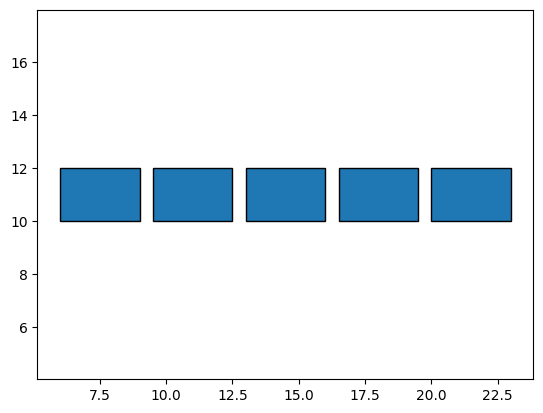

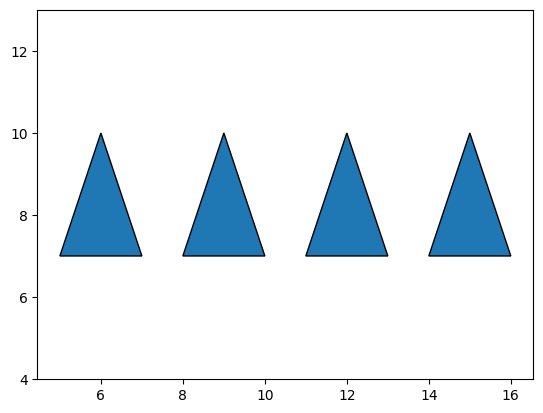

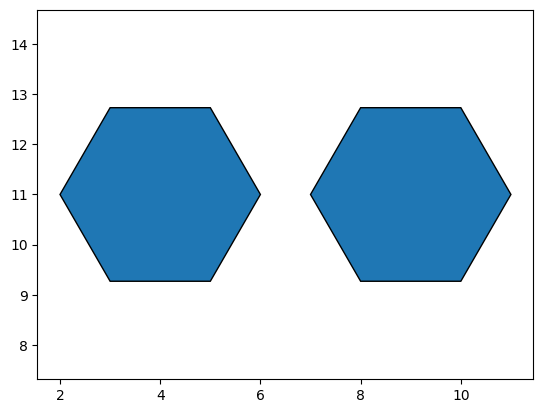

In [ ]:
#паралелльный перенос
rectangles = gen_rectangle(0, 0, 3, 2, 3.5, 0)
five_rectangles = gen_figures(rectangles, 5)
triangles = gen_triangle(0, 0, 2, 3, 3, 0)
four_triangles = gen_figures(triangles, 4)
hexagons = gen_hexagon(0, 2, 2, 5, 0)
two_hexagons = gen_figures(hexagons, 2)

translate_rectangles = map(lambda pol: tr_translate(pol, 6,10),five_rectangles)
translate_triangles = map(lambda pol: tr_translate(pol,5,7),four_triangles)
translate_hexagons = map(lambda pol: tr_translate(pol, 4,9),two_hexagons)

rectangle_translate = tuple(rectangle for rectangle in translate_rectangles)
triangles_translate = tuple(triangle for triangle in translate_triangles)
hexagons_translate = tuple(hexagon for hexagon in translate_hexagons)

visualize_polygon_sequence(rectangle_translate)
visualize_polygon_sequence(triangles_translate)
visualize_polygon_sequence(hexagons_translate)

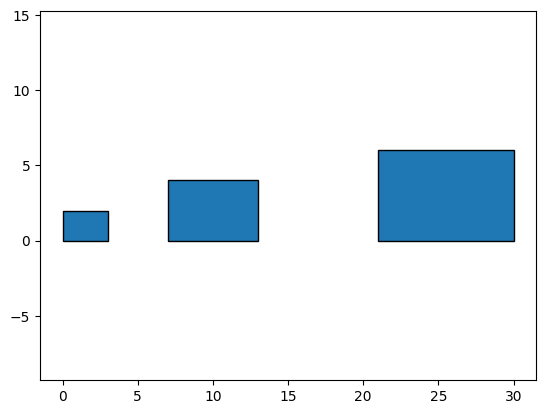

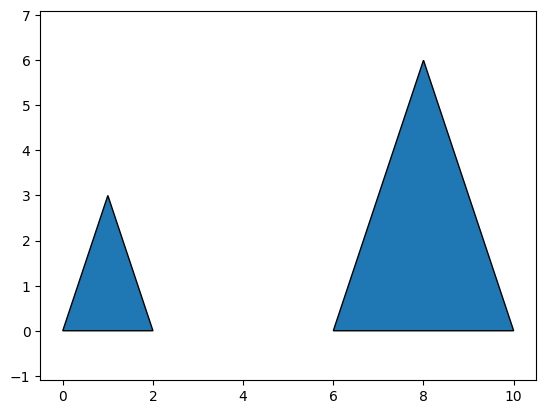

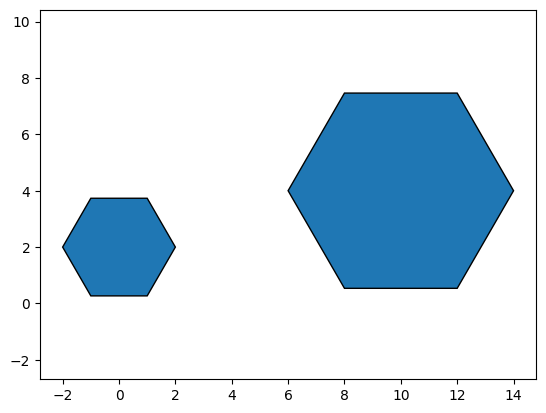

In [ ]:
#гомотетия
rectangles = gen_rectangle(0, 0, 3, 2, 3.5, 0)
three_rectangles = gen_figures(rectangles, 3)
triangles = gen_triangle(0, 0, 2, 3, 3, 0)
two_triangles = gen_figures(triangles, 2)
hexagons = gen_hexagon(0, 2, 2, 5, 0)
two_hexagons = gen_figures(hexagons, 2)

homothety_rectangles = list(map(lambda idx_rect: tr_homothety(idx_rect[1], idx_rect[0] + 1), enumerate(three_rectangles)))
homothety_triangles  = list(map(lambda idx_rect: tr_homothety(idx_rect[1], idx_rect[0] + 1), enumerate(two_triangles)))
homothety_hexagons = list(map(lambda idx_rect: tr_homothety(idx_rect[1], idx_rect[0] + 1), enumerate(two_hexagons)))

rectangle_homothety = tuple(rectangle for rectangle in homothety_rectangles)
triangles_homothety = tuple(triangle for triangle in homothety_triangles)
hexagons_homothety = tuple(hexagon for hexagon in homothety_hexagons)


visualize_polygon_sequence(rectangle_homothety)
visualize_polygon_sequence(triangles_homothety)
visualize_polygon_sequence(hexagons_homothety )


4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.



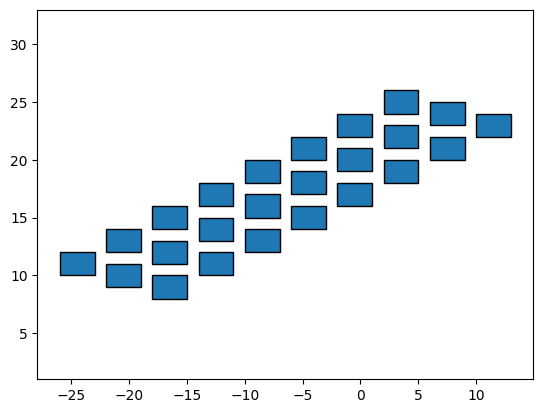

In [ ]:
#три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;
rectangle_1 = gen_rectangle(-30, 0, 3, 2, 4, 2)
eight_rectangle_1 = gen_figures(rectangle_1, 8)
rotated_rectangle_1 = map(lambda pol: tr_translate(pol, 4 ,10),  eight_rectangle_1)
rectangle_1_rotate = list(tuple(rectangle_1 for rectangle_1 in rotated_rectangle_1))

rectangle_2 = gen_rectangle(-30, -5, 3, 2, 4, 2)
eight_rectangle_2 = gen_figures(rectangle_2, 8)
rotated_rectangle_2 = map(lambda pol: tr_translate(pol, 8 ,14),  eight_rectangle_2)
rectangle_2_rotate = list(tuple(rectangle_2 for rectangle_2 in rotated_rectangle_2))

rectangle_3 = gen_rectangle(-30, -10, 3, 2, 4, 2)
eight_rectangle_3 = gen_figures(rectangle_3, 8)
rotated_rectangle_3 = map(lambda pol: tr_translate(pol, 12 ,18),  eight_rectangle_3)
rectangle_3_rotate = list(tuple(rectangle_3 for rectangle_3 in rotated_rectangle_3))

visualize_polygon_sequence(rectangle_1_rotate + rectangle_2_rotate + rectangle_3_rotate)

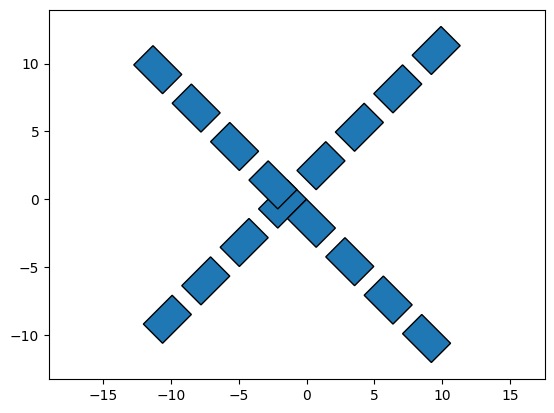

In [ ]:
#две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;
rectangle_1 = gen_rectangle(-15, 0, 3, 2, 4, 0)
eight_rectangle_1 = gen_figures(rectangle_1, 8)
rotated_rectangle_1 = map(lambda pol: tr_rotate(pol, math.radians(45)),  eight_rectangle_1)
rectangle_1_rotate = list(tuple(rectangle_1 for rectangle_1 in rotated_rectangle_1))

rectangle_2 = gen_rectangle(-15, 0, 3, 2, 4, 0)
eight_rectangle_2 = gen_figures(rectangle_2, 8)
rotated_rectangle_2 = map(lambda pol: tr_rotate(pol, math.radians(135)),  eight_rectangle_2)
rectangle_2_rotate = list(tuple(rectangle_2 for rectangle_2 in rotated_rectangle_2))

visualize_polygon_sequence(rectangle_1_rotate + rectangle_2_rotate )

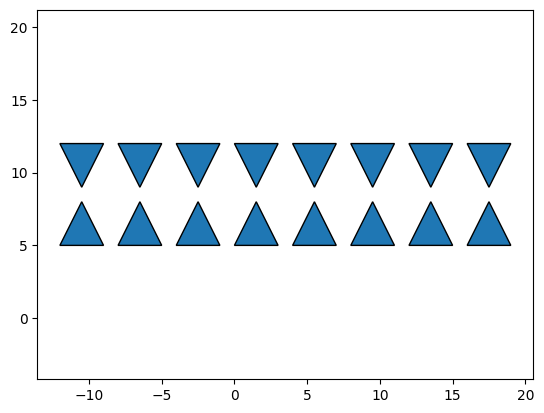

In [ ]:
triangle_1 = gen_triangle(-12, 5, 3, 3, 4, 0)
eight_triangle_1 = gen_figures(triangle_1, 8)
tr_symmetry_1 = map(lambda pol: tr_symmetry(pol,'x'), eight_triangle_1)
triangles_1_symmetry = list(tuple(triangle_1 for triangle_1 in eight_triangle_1))

triangle_2 = gen_triangle(-12, -12, 3, 3, 4, 0)
eight_triangle_2 = gen_figures(triangle_2, 8)
tr_symmetry_2  = map(lambda pol: tr_symmetry(pol,'x'), eight_triangle_2)
triangles_2_symmetry = list(tuple( triangle_2 for triangle_2 in tr_symmetry_2 ))

visualize_polygon_sequence(triangles_1_symmetry+triangles_2_symmetry)

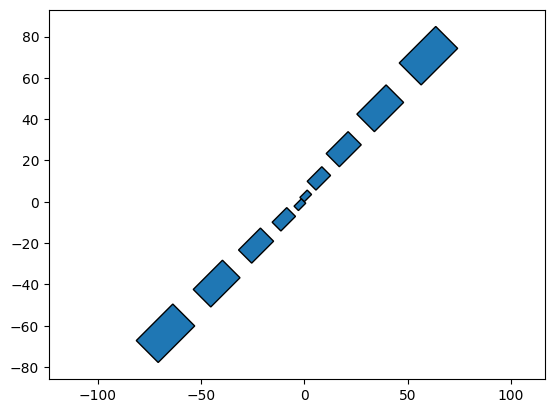

In [ ]:
#последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.
rectangle_1 = gen_rectangle(0, 0, 5, 3, 4, 0)
rectangle_2 = gen_rectangle(0, -2, 5, 3, 4, 0)

five_rectangle_1 = gen_figures(rectangle_1, 5)
five_rectangle_2 = gen_figures(rectangle_2, 5)

homothetic_rectangle_1 = list(map(lambda idx_rect: tr_homothety(idx_rect[1], idx_rect[0] + 1), enumerate(five_rectangle_1)))
homothetic_rectangle_2=list(map(lambda idx_rect: tr_homothety(idx_rect[1], idx_rect[0] + 1), enumerate(five_rectangle_2)))

rectangle_1_homothetic = list(tuple(rectangle_1 for rectangle_1 in homothetic_rectangle_1))
rectangle_2_homothetic = list(tuple(rectangle_2 for rectangle_2 in homothetic_rectangle_2))

rotated_rectangle_1 = map(lambda pol: tr_rotate(pol, math.radians(45)),  rectangle_1_homothetic)
rotated_rectangle_2 = map(lambda pol: tr_rotate(pol, math.radians(225)),  rectangle_2_homothetic)

rectangle_1_rotate = list(tuple(rectangle_1 for rectangle_1 in rotated_rectangle_1))
rectangle_2_rotate = list(tuple(rectangle_2 for rectangle_2 in rotated_rectangle_2))

visualize_polygon_sequence(rectangle_1_rotate + rectangle_2_rotate)

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

[((0, 0), (3, 0), (3, 2), (0, 2)), ((3.5, 0), (6.5, 0), (6.5, 2), (3.5, 2))]


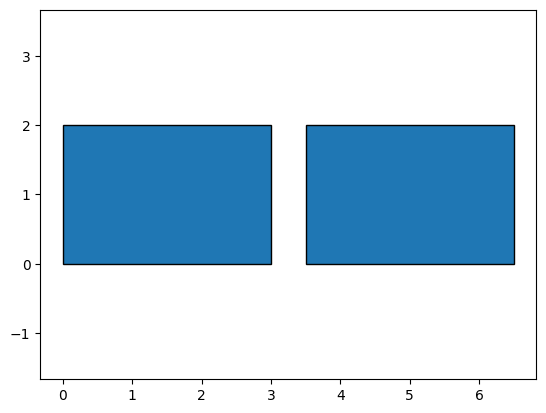

In [ ]:
#фильтрации фигур, являющихся выпуклыми многоугольниками (flt_convex_polygon);
# определение выпуклости многоугольника:
#если для всех троек последовательных вершин направление их векторных произведений одинаково (либо все положительные, либо все отрицательные), то многоугольник выпуклый.
def is_convex_polygon(polygon):
    if len(polygon) < 3:
        return False
    def cross_product(p1, p2, p3):
        return (p2[0] - p1[0]) * (p3[1] - p2[1]) - (p2[1] - p1[1]) * (p3[0] - p2[0])
    direction = None
    for i in range(len(polygon)):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % len(polygon)]
        x3, y3 = polygon[(i + 2) % len(polygon)]
        cp = cross_product((x1, y1), (x2, y2), (x3, y3))
        if direction is None:
            direction = cp
        else:
            if cp * direction < 0:
                return False
    return True
def flt_convex_polygon(polygon_sequence):
    return filter(lambda polygon: is_convex_polygon(polygon), polygon_sequence)

rectangles = gen_rectangle(0, 0, 3, 2, 3.5, 0)
two_rectangles = gen_figures(rectangles, 2)
polygon_sequence = tuple(rectangle for rectangle in two_rectangles)
convex_polygons = list(flt_convex_polygon(polygon_sequence))
print(convex_polygons)
visualize_polygon_sequence(convex_polygons)

[((0, 0), (1, 0), (1, 1), (0, 1)), ((1, 0), (2, 0), (2, 1), (1, 1))]


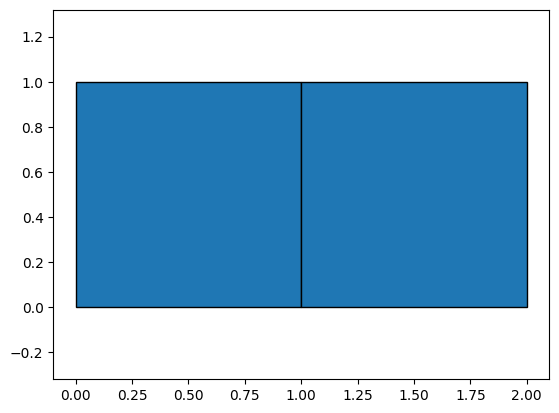

In [43]:
#фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой
def flt_angle_point(polygon_sequence, point):
    return filter(lambda polygon: point in polygon, polygon_sequence)
rectangles = gen_rectangle(0, 0, 1, 1, 1, 0)
point = (1, 1)
three_rectangles = gen_figures(rectangles, 3)
polygon_sequence = tuple(rectangle for rectangle in three_rectangles)
filtered_polygons = list(flt_angle_point(polygon_sequence, point))
print(filtered_polygons)
visualize_polygon_sequence(filtered_polygons)

In [45]:
#фильтрации фигур, имеющих площадь меньше заданной
#формулу для вычисления площади многоугольника через координаты его вершин(формула пика: S = В − 1 + Г:2)
def polygon_area(polygon):
    x = [p[0] for p in polygon]
    y = [p[1] for p in polygon]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def flt_square(polygon_sequence, min_area):
    return filter(lambda polygon: polygon_area(polygon) < min_area, polygon_sequence)

rectangles = gen_rectangle(0, 0, 1, 1, 1, 0)
min_area = 2
three_rectangles = gen_figures(rectangles, 3)
polygon_sequence = tuple(rectangle for rectangle in three_rectangles)
filtered_polygons = list(flt_square(polygon_sequence, min_area))
print(filtered_polygons)

[((0, 0), (1, 0), (1, 1), (0, 1)), ((1, 0), (2, 0), (2, 1), (1, 1)), ((2, 0), (3, 0), (3, 1), (2, 1))]


In [47]:
#фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения
def calculate_area(polygon):#площадь многоугольника через сумму произведений координат вершин
    return 0.5 * abs(sum(x0*y1 - x1*y0 for ((x0, y0), (x1, y1)) in zip(polygon, polygon[1:] + [polygon[0]])))

def flt_square(polygons, threshold):#оставляет только те, у которых площадь больше или равна значению
    return [polygon for polygon in polygons if calculate_area(polygon) >= threshold]

def calculate_shortest_side(polygon):#длина короткой стороны
    side_lengths = [math.dist(polygon[i], polygon[(i+1) % len(polygon)]) for i in range(len(polygon))]
    return min(side_lengths)

def flt_short_side(polygons, threshold):
    return [polygon for polygon in polygons if calculate_shortest_side(polygon) >= threshold]


rectangles = gen_rectangle(0, 0, 3, 3, 1, 0)
three_rectangles = gen_figures(rectangles, 1)
polygons = tuple(rectangle for rectangle in three_rectangles)
filtered_polygons = list(flt_short_side(polygons,3))
print(filtered_polygons)

[((0, 0), (3, 0), (3, 3), (0, 3))]


In [40]:
#фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника)
def is_convex(polygon):
    def direction(p1, p2, p3):
        return (p3[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p3[0] - p1[0])
    positive = False
    negative = False
    n = len(polygon)
    for i in range(n):
        d = direction(polygon[i], polygon[(i+1) % n], polygon[(i+2) % n])
        if d > 0:
            positive = True
        elif d < 0:
            negative = True
    return not (positive and negative)

def flt_point_inside(polygons, point):
    return [polygon for polygon in polygons if is_convex(polygon) and is_point_inside_polygon(point, polygon)]

def is_point_inside_polygon(point, polygon):#сколько раз луч, проведенный из точки вправо, пересекает ребро многоугольника. Если количество пересечений нечетное, то точка находится внутри многоугольника.
    x, y = point
    n = len(polygon)
    inside = False
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i+1) % n]
        if y1 < y <= y2 or y2 < y <= y1:
            if x1 + (y - y1) / (y2 - y1) * (x2 - x1) < x:
                inside = not inside
    return inside
rectangles = gen_rectangle(0, 0, 1, 2, 2, 0)
point = (0.5, 0.5)
three_rectangles = gen_figures(rectangles, 3)
polygon_sequence = tuple(rectangle for rectangle in three_rectangles)
filtered_polygons = flt_point_inside(polygon_sequence, point)
for polygon in filtered_polygons:
    print(polygon)


((0, 0), (1, 0), (1, 2), (0, 2))


In [42]:
#фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника
#вычисляет углы между последовательными ребрами и добавляет их во множество
def flt_polygon_angles_inside(polygons, ref_polygon):
    def get_polygon_angles(polygon):
        angles = set()
        for i in range(len(polygon)):
            p1 = polygon[i]
            p2 = polygon[(i + 1) % len(polygon)]
            p3 = polygon[(i + 2) % len(polygon)]
            v1 = (p1[0] - p2[0], p1[1] - p2[1])
            v2 = (p3[0] - p2[0], p3[1] - p2[1])
            dot_product = v1[0] * v2[0] + v1[1] * v2[1]
            mag_v1 = math.sqrt(v1[0] ** 2 + v1[1] ** 2)
            mag_v2 = math.sqrt(v2[0] ** 2 + v2[1] ** 2)
            angle = math.degrees(math.acos(dot_product / (mag_v1 * mag_v2)))
            angles.add(angle)
        return angles

    ref_polygon_angles = get_polygon_angles(ref_polygon)
    return [polygon for polygon in polygons if is_convex(polygon) and any(angle in ref_polygon_angles for angle in get_polygon_angles(polygon))]

rectangles = gen_rectangle(0, 0, 1, 2, 2, 0)
three_rectangles = gen_figures(rectangles, 3)
polygon_sequence = tuple(rectangle for rectangle in three_rectangles)
reference_polygon = [(0, 0), (0, 1), (1, 1)]
filtered_polygons = flt_polygon_angles_inside(polygon_sequence, reference_polygon)
for polygon in filtered_polygons:
    print(polygon)

((0, 0), (1, 0), (1, 2), (0, 2))
((2, 0), (3, 0), (3, 2), (2, 2))
((4, 0), (5, 0), (5, 2), (4, 2))
